In [1]:
# basic
import pandas as pd
import numpy as np
from tqdm import tqdm
import time

# user-defined
from agent_network import *
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
from environment import market_envrionment

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [1]:
# basic
import pandas as pd
import numpy as np
from tqdm import tqdm
import time

In [7]:
file_path_dow = '/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/output/table/DQN_performance.csv'
file_path_50 = '/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/output/table/RL_performance_50_tbn.csv'
performance_dow = pd.read_csv(file_path_dow)
performance_50 = pd.read_csv(file_path_50, usecols=[1,2,3,4])

In [4]:
latex_table_path_dow = '/Users/cheng/Dropbox/Apps/Overleaf/Weekly Report Cheng/table/performance_dow.tex'
latex_table_path_50 = '/Users/cheng/Dropbox/Apps/Overleaf/Weekly Report Cheng/table/performance_50.tex'
performance_dow.to_latex(latex_table_path_dow, index=False)
performance_50.to_latex(latex_table_path_50, index=False)

In [12]:
tup=(1, 2, 3, 4, 5)
tup(2) = 10

SyntaxError: can't assign to function call (<ipython-input-12-7890fd2cc040>, line 2)

In [2]:
# initialization for agent and environment
env = market_envrionment()
state_size = env.observation_space[0] # given from environment
action_size = env.action_space.shape[0]
agent = DQNAgent(state_size, action_size)
# agent.load("./save/cartpole-dqn.h5")

# hyper-parameter
done = False
batch_size = 5
history = []
EPISODES = 100

for e in tqdm(range(EPISODES)): # one episode is M trading years in a period
    
    # initialize state
    state = env.reset()
    state = np.reshape(state, [1, state_size]) # an array containing only one array [[a,b,c,d]]
    rewards = 0
    
    for time in range(17): # how many years in a training period

        # take an action
        action = agent.act(state)
        
        # environment responds to the action and return new state and reward
        next_state, reward, done = env.step(action)
        
        # record reward
        rewards += reward
        
        # reshape state since the neural network expects an array with rank 2 (can be reshaped within env)
        next_state = np.reshape(next_state, [1, state_size]) # an 1 x n 2d array
        
        # record the experience for replay
        agent.memorize(state, action, reward, next_state, done) # record every trading 
        
        # transit to next state
        state = next_state
        
        # determine if the game is over or not
        if done:
            break
            
        # if there are enough experiences accumulated, replay to train the network    
        if len(agent.memory) > batch_size: # batch_size = 2 to make agent learn for every 3 trading events
            agent.replay(batch_size)
            
    print("episode: {}/{}, score: {}, e: {:.2}, rewards: {}"
                    .format(e, EPISODES, time, agent.epsilon, rewards))
    history.append([e, time, agent.epsilon, rewards])



100%|██████████| 100/100 [10:14<00:00,  6.15s/it]episode: 99/100, score: 16, e: 0.01, rewards: 1.6567748832060158



In [4]:
def training_plot(history):
    df = pd.DataFrame(history, columns =["episode", "total_time","epsilon",'reward'])
    df.set_index("episode")
    df.to_csv('../output/RL_training_data_1.jpg')
    figs, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

    axs[0].set_title('Total Rewards for each episode')
    axs[0].plot(df.index, df['reward'].rolling(5).mean())
    axs[0].set_ylabel('total rewards')

    axs[1].set_title('Epsilon(exploring rate) for each episode')
    axs[1].plot(df.index, df['epsilon'])
    axs[1].set_ylabel('epsilon')

    plt.tight_layout()
    figs.savefig('../picture/RL_training_plots_1.jpg')
    plt.show()

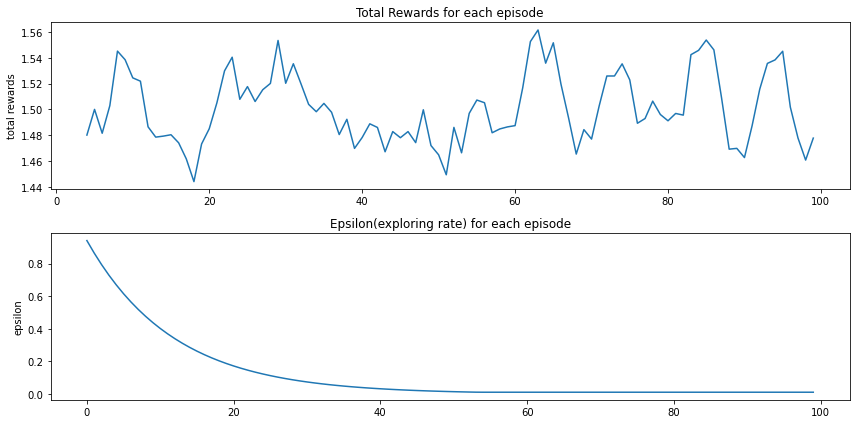

In [5]:
# save training plots
training_plot(history)

In [17]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
import numpy as np
test = [1,2,3,4,5]
np.stack(test, axis = 0)

array([1, 2, 3, 4, 5])

# 2. Policy Gradient

In [5]:
# initialization for agent and environment
env = market_envrionment()
state = env.reset()
state_size = env.observation_space[0] # given from environment
action_size = env.action_space.shape[0]
agent = PGAgent(state_size, action_size)

# hyper-parameter and containers
score = 0
episode = 0
training_years = 17
total_episodes = 300
verbose = False
history = []

for episode in tqdm(range(total_episodes)):

    state = env.reset()
    score = 0

    for _ in range(training_years):

        start_time = time.time()
        action, prob = agent.act(state)
        state, reward, done = env.step(action)
        score += reward
        agent.memorize(state, action, prob, reward)
        if done:
            break

    # update agent at the end of each episod
    agent.train()
    if verbose:
        print('Episode: %d - Score: %.2f - time: %.2f' % (episode, score, time.time()-start_time))
    history.append([episode, score])
    if episode > 1 and episode % 10 == 0:
        agent.save('pong.h5')

  0%|          | 0/300 [00:00<?, ?it/s]Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
states (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 24)           48          states[0][0]                     
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 24)           600         dense_3[0][0]                    
__________________________________________________________________________________________________
rewards (InputLayer)            [(None, 1)]          0                                            
________________________________________________

<AxesSubplot:>

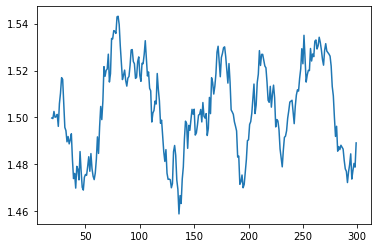

In [8]:
df = pd.DataFrame(history, columns =["episode",'reward'])
df.set_index("episode")
df['reward'].rolling(20).mean().plot()

In [13]:
agent.states

[]

## 2.2 Test Performance

In [ ]:
while not done:

    action, prob = agent.act(state)
    state, reward, done = env.step(action)

In [ ]:
# initialization for agent and environment
env = market_envrionment()
state = env.reset()

In [ ]:
action, prob = agent.act(state)
state, reward, done = env.step(action)
score += reward